In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import glob
from tqdm import tqdm_notebook as tqdm

import jax.numpy as jnp

from astropy.table import Table
import pandas as pd
from astropy.io import fits

import pygtc
import pdb

from readcol import * 
from make_mask import *
from naming_script import *

import nrm_analysis as implaneia
from nrm_analysis.misctools import mask_definitions
from nrm_analysis.misctools import oifits

f2f,mask = mask_definitions.jwst_g7s6c()


[files] = readcol('../data/noises_c.txt', twod=False)
[files2] = readcol('../data/noises_t.txt', twod=False)

import matplotlib as mpl
mpl.rcParams['axes.formatter.useoffset'] = False


In [2]:
sampip_baselines = Table.read('../data/sampip_baselines.csv',format='ascii')
sampip_mask = Table.read('../data/sampip_mask.csv',format='ascii')
sampip_baselines['indices']=list(sampip_baselines['indices'])

sampip_u1=np.array([1.139,1.139,1.139,1.139,1.139,1.139,1.139,1.139,1.139,
           -1.143,-1.143,-1.143,-3.425,-3.425,-3.425,-0.,-0.,-0.,
           -0.,-2.282,-2.282,-2.282,-4.564,-4.564,-4.564,-2.282,
           -2.282,-2.282,-4.564,-4.564,-4.564,-2.282,-2.282,-2.282,0.,])
sampip_v1=np.array([-0.663,-0.663,-0.663,-0.663,-0.663,-1.98,-1.98,-1.98,
           -1.98,-4.615,-4.615,-4.615,-3.297,-3.297,-0.663,-1.317,
           -1.317,-1.317,-1.317,-3.952,-3.952,-3.952,-2.634,-2.634,
           0.,-2.635,-2.635,-2.635,-1.317,-1.317,1.317,1.318,1.318,3.952,2.634])
sampip_u2=np.array([-0.,-2.282,-4.564,-4.564,-3.425,-2.282,-4.564,-4.564,-3.425,
           -2.282,-2.282,-1.143,0.,1.139,1.139,-2.282,-4.564,-4.564,
           -3.425,-2.282,-2.282,-1.143,0.,1.139,1.139,-2.282,-2.282,
           -1.143,0.,1.139,1.139,0.,1.139,1.139,1.139])
sampip_v2=np.array([-1.317,-3.952,-2.634,0.,0.663,-2.635,-1.317,1.317,1.98,1.318,
           3.952,4.615,2.634,3.297,0.663,-2.635,-1.317,1.317,1.98,1.318,
           3.952,4.615,2.634,3.297,0.663,1.318,3.952,4.615,2.634,3.297,
           0.663,2.634,3.297,0.663,0.663])

sampip_b = np.sqrt(sampip_baselines['x']**2 + sampip_baselines['y']**2)
sampip_sumbl = np.sqrt(sampip_u1**2+sampip_v1**2) + np.sqrt(sampip_u2**2+sampip_v2**2)

In [3]:
barray, bls = makebaselines(mask)
triples, uvs = maketriples_all(mask)

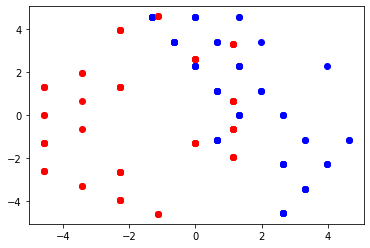

In [4]:
plt.scatter(uvs[:,0,0],uvs[:,0,1],color='b')
plt.scatter(uvs[:,1,0],uvs[:,1,1],color='b')

plt.scatter(sampip_u1,sampip_v1,color='r')
plt.scatter(sampip_u2,sampip_v2,color='r')

In [5]:
sampip_indices = Table.read('../data/sampip_indices.txt',format='ascii')
sampip_triangles = Table.read('../data/sampip_triangles.txt',format='ascii')

sampip_hole_triangles = np.zeros((35,3),dtype='int')
for k,triangle in enumerate(sampip_triangles):
#     print(np.array(triangle))
    b1 = set(sampip_indices[triangle[0]-1])
    b2 = set(sampip_indices[triangle[1]-1])
    b3 = set(sampip_indices[triangle[2]-1])
    this_tri = b1.union(b2).union(b3)
    sampip_hole_triangles[k,:] = list(this_tri)

In [6]:
b = np.sqrt(np.sum(bls**2,axis=1))
sumbl = np.sum(np.sqrt((uvs)**2).sum(axis=2),axis=1)

In [10]:
ls ../data/ImPlaneIA/multi*.oifits

../data/ImPlaneIA/multi_c_pa0_sep200_F380M_sky_81px_x11__F380M_81_flat_x11_bkgd__00_mir.oifits
../data/ImPlaneIA/multi_c_pa0_sep200_F380M_sky_81px_x11__F380M_81_flat_x11_bkgd_flat__00_mir.oifits
../data/ImPlaneIA/multi_c_pa0_sep200_F380M_sky_81px_x11__F380M_81_flat_x11_bkgd_jitt__00_mir.oifits
../data/ImPlaneIA/multi_c_pa0_sep200_F380M_sky_81px_x11__F380M_81_flat_x11_bkgd_jitt_flat__00_mir.oifits
../data/ImPlaneIA/multi_c_pa0_sep200_F380M_sky_81px_x11__F380M_81_flat_x11_dark__00_mir.oifits
../data/ImPlaneIA/multi_c_pa0_sep200_F380M_sky_81px_x11__F380M_81_flat_x11_dark_bkgd__00_mir.oifits
../data/ImPlaneIA/multi_c_pa0_sep200_F380M_sky_81px_x11__F380M_81_flat_x11_dark_bkgd_flat__00_mir.oifits
../data/ImPlaneIA/multi_c_pa0_sep200_F380M_sky_81px_x11__F380M_81_flat_x11_dark_bkgd_jitt__00_mir.oifits
../data/ImPlaneIA/multi_c_pa0_sep200_F380M_sky_81px_x11__F380M_81_flat_x11_dark_bkgd_jitt_flat__00_mir.oifits

../data/ImPlaneIA/multi_c_pa0_sep200_F380M_sky_81px_x11__F380M_81_flat_x11_dark_jitt

In [11]:
for noisetup in noise_comb:
    print('%s' % '_'.join(noisetup))


read
flat
dark
bkgd
jitt
read_flat
read_dark
read_bkgd
read_jitt
flat_dark
flat_bkgd
flat_jitt
dark_bkgd
dark_jitt
bkgd_jitt
read_flat_dark
read_flat_bkgd
read_flat_jitt
read_dark_bkgd
read_dark_jitt
read_bkgd_jitt
flat_dark_bkgd
flat_dark_jitt
flat_bkgd_jitt
dark_bkgd_jitt
read_flat_dark_bkgd
read_flat_dark_jitt
read_flat_bkgd_jitt
read_dark_bkgd_jitt
flat_dark_bkgd_jitt
read_flat_dark_bkgd_jitt


## Loop over all files

In [12]:
all_data = glob.glob('../data/*.npz')
ia_data = glob.glob('../data/ImPlaneIA/*.oifits')
# all_data

## Ok let's now loop through these.

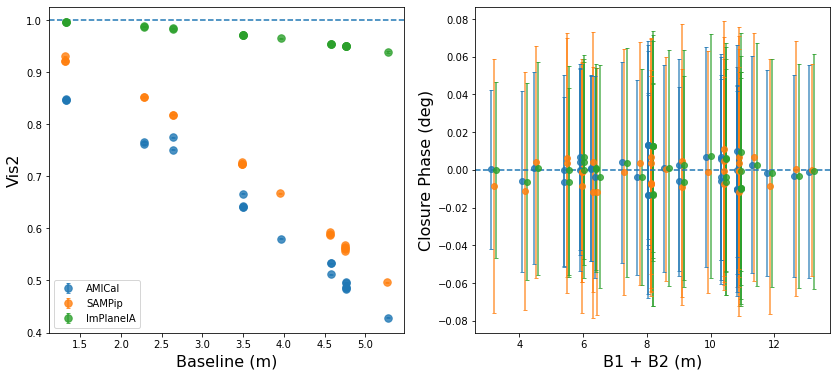

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14.0,6.0))

# get filenames

calfile_sampip = fname_generator('c',90,200,None,'')    
targfile_sampip = fname_generator('t',90,200,None,'')

calfile_amical = fname_generator('c',90,200,'amical','')    
targfile_amical = fname_generator('t',90,200,'amical','')
#load data

calfile_implaneia = fname_generator_implaneia('c',90,200,'')    
targfile_implaneia = fname_generator_implaneia('t',90,200,'')    

cal_amical = np.load(calfile_amical)
targ_amical = np.load(targfile_amical)

cal_sampip = np.load(calfile_sampip)
targ_sampip = np.load(targfile_sampip)

cal_implaneia = oifits.load(calfile_implaneia)
targ_implaneia = oifits.load(targfile_implaneia)


#amical

v2_cal = cal_amical['V2']
cp_cal = cal_amical['CP']

v2_targ = targ_amical['V2']
cp_targ = targ_amical['CP']

v2_calmean, v2_calstd, v2_calcov = np.mean(v2_cal,axis=0), np.std(v2_cal,axis=0), np.cov(v2_cal.T)
cp_calmean, cp_calstd, cp_calcov = np.mean(cp_cal,axis=0), np.std(cp_cal, axis=0), np.cov(cp_cal.T)

v2_targmean, v2_targstd, v2_targcov = np.mean(v2_targ,axis=0), np.std(v2_targ,axis=0), np.cov(v2_targ.T)
cp_targmean, cp_targstd, cp_targcov = np.mean(cp_targ,axis=0), np.std(cp_targ, axis=0), np.cov(cp_targ.T)

ax1.errorbar(b,v2_targmean,yerr=v2_targstd,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=15,label='AMICal')
ax2.errorbar(sumbl,cp_targmean,yerr=cp_targstd,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=12);

#sampip

v2_cal = cal_sampip['V2']
cp_cal = cal_sampip['CP']

v2_targ = targ_sampip['V2']
cp_targ = targ_sampip['CP']

v2_calmean, v2_calstd, v2_calcov = np.mean(v2_cal,axis=0), np.std(v2_cal,axis=0), np.cov(v2_cal.T)
cp_calmean, cp_calstd, cp_calcov = np.mean(cp_cal,axis=0), np.std(cp_cal, axis=0), np.cov(cp_cal.T)

v2_targmean, v2_targstd, v2_targcov = np.mean(v2_targ,axis=0), np.std(v2_targ,axis=0), np.cov(v2_targ.T)
cp_targmean, cp_targstd, cp_targcov = np.mean(cp_targ,axis=0), np.std(cp_targ, axis=0), np.cov(cp_targ.T)

ax1.errorbar(sampip_b,v2_targmean,yerr=v2_targstd,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=15,label='SAMPip')
ax2.errorbar(sumbl+0.075,cp_targmean,yerr=cp_targstd,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=12);

#implaneia

v2_cal = cal_implaneia['OI_VIS2']['VIS2DATA'].T
cp_cal = cal_implaneia['OI_T3']['T3PHI'].T

v2_targ = targ_implaneia['OI_VIS2']['VIS2DATA'].T
cp_targ = targ_implaneia['OI_T3']['T3PHI'].T

v2_calmean, v2_calstd, v2_calcov = np.mean(v2_cal,axis=0), np.std(v2_cal,axis=0), np.cov(v2_cal.T)
cp_calmean, cp_calstd, cp_calcov = np.mean(cp_cal,axis=0), np.std(cp_cal, axis=0), np.cov(cp_cal.T)

v2_targmean, v2_targstd, v2_targcov = np.mean(v2_targ,axis=0), np.std(v2_targ,axis=0), np.cov(v2_targ.T)
cp_targmean, cp_targstd, cp_targcov = np.mean(cp_targ,axis=0), np.std(cp_targ, axis=0), np.cov(cp_targ.T)

ax1.errorbar(b,v2_targmean,yerr=v2_targstd,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=15,label='ImPlaneIA')
ax2.errorbar(sumbl+0.15,cp_targmean,yerr=cp_targstd,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=12);

# labels
ax1.set_xlabel('Baseline (m)',fontsize=16)
ax1.set_ylabel('Vis2',fontsize=16)

ax2.set_xlabel('B1 + B2 (m)',fontsize=16)
ax2.set_ylabel('Closure Phase (deg)',fontsize=16)

ax1.axhline(1.0,linestyle='--')
ax2.axhline(0.0,linestyle='--')

# ax3.imshow()

ax1.legend()

# ax1.legend((ami,imp),('Amical','ImPlaneIA'))
plt.savefig('photonly_amical_sampip.png',bbox_inches='tight')

../data/corr_t_pa90_sep200_F380M_sky_81px_x11__F380M_81_flat_x11_photonly_00_mir.npz


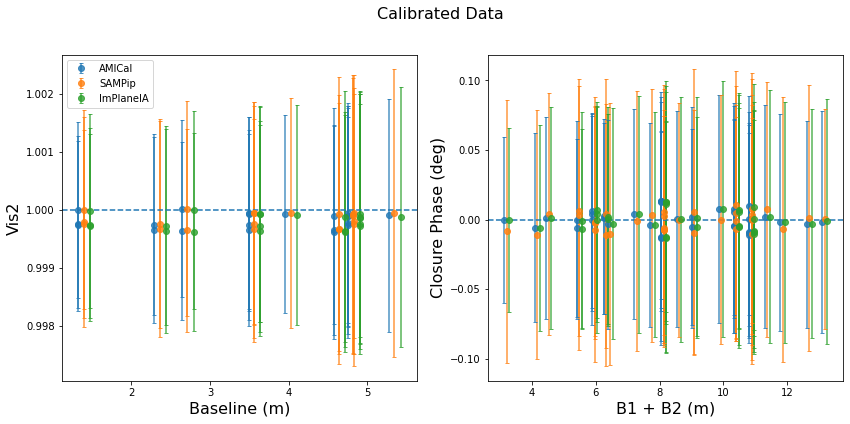

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14.0,6.0))

# get filenames

calfile_sampip = fname_generator('c',90,200,None,'')    
targfile_sampip = fname_generator('t',90,200,None,'')
print(targfile_sampip)

calfile_amical = fname_generator('c',90,200,'amical','')    
targfile_amical = fname_generator('t',90,200,'amical','')

calfile_implaneia = fname_generator_implaneia('c',90,200,'')    
targfile_implaneia = fname_generator_implaneia('t',90,200,'')    
#load data

cal_amical = np.load(calfile_amical)
targ_amical = np.load(targfile_amical)

cal_sampip = np.load(calfile_sampip)
targ_sampip = np.load(targfile_sampip)

cal_implaneia = oifits.load(calfile_implaneia)
targ_implaneia = oifits.load(targfile_implaneia)


#amical

v2_cal = cal_amical['V2']
cp_cal = cal_amical['CP']

v2_targ = targ_amical['V2']
cp_targ = targ_amical['CP']


v2_mean, v2_std, v2_cov = np.mean(v2_targ/v2_cal,axis=0), np.std(v2_targ/v2_cal,axis=0), np.cov((v2_targ/v2_cal).T)
cp_mean, cp_std, cp_cov = np.mean(cp_targ-cp_cal,axis=0), np.std(cp_targ-cp_cal, axis=0), np.cov((cp_targ-cp_cal).T)

ax1.errorbar(b,v2_mean,yerr=v2_std,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=12,label='AMICal')
ax1.axhline(1.0,linestyle='--')
ax2.errorbar(sumbl,cp_mean,yerr=cp_std,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=12);
ax2.axhline(0.0,linestyle='--')

#sampip

v2_cal = cal_sampip['V2']
cp_cal = cal_sampip['CP']

v2_targ = targ_sampip['V2']
cp_targ = targ_sampip['CP']

v2_mean, v2_std, v2_cov = np.mean(v2_targ/v2_cal,axis=0), np.std(v2_targ/v2_cal,axis=0), np.cov((v2_targ/v2_cal).T)
cp_mean, cp_std, cp_cov = np.mean(cp_targ-cp_cal,axis=0), np.std(cp_targ-cp_cal, axis=0), np.cov((cp_targ-cp_cal).T)

ax1.errorbar(sampip_b+0.075,v2_mean,yerr=v2_std,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=12,label='SAMPip')
ax2.errorbar(sumbl+0.075,cp_mean,yerr=cp_std,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=12);


#implaneia

v2_cal = cal_implaneia['OI_VIS2']['VIS2DATA'].T
cp_cal = cal_implaneia['OI_T3']['T3PHI'].T

v2_targ = targ_implaneia['OI_VIS2']['VIS2DATA'].T
cp_targ = targ_implaneia['OI_T3']['T3PHI'].T

v2_mean, v2_std, v2_cov = np.mean(v2_targ/v2_cal,axis=0), np.std(v2_targ/v2_cal,axis=0), np.cov((v2_targ/v2_cal).T)
cp_mean, cp_std, cp_cov = np.mean(cp_targ-cp_cal,axis=0), np.std(cp_targ-cp_cal, axis=0), np.cov((cp_targ-cp_cal).T)


ax1.errorbar(b+0.15,v2_mean,yerr=v2_std,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=12,label='ImPlaneIA')
ax2.errorbar(sumbl+0.15,cp_mean,yerr=cp_std,linestyle='',fmt='.',capsize=2,alpha=0.8,markersize=12);

# labels
ax1.set_xlabel('Baseline (m)',fontsize=16)
ax1.set_ylabel('Vis2',fontsize=16)

ax2.set_xlabel('B1 + B2 (m)',fontsize=16)
ax2.set_ylabel('Closure Phase (deg)',fontsize=16)


# ax3.imshow()

ax1.legend()
plt.suptitle('Calibrated Data',y=0.99,fontsize=16)

# ax1.legend((ami,imp),('Amical','ImPlaneIA'))
plt.savefig('photonly_calibrated_amical_sampip.png',bbox_inches='tight')

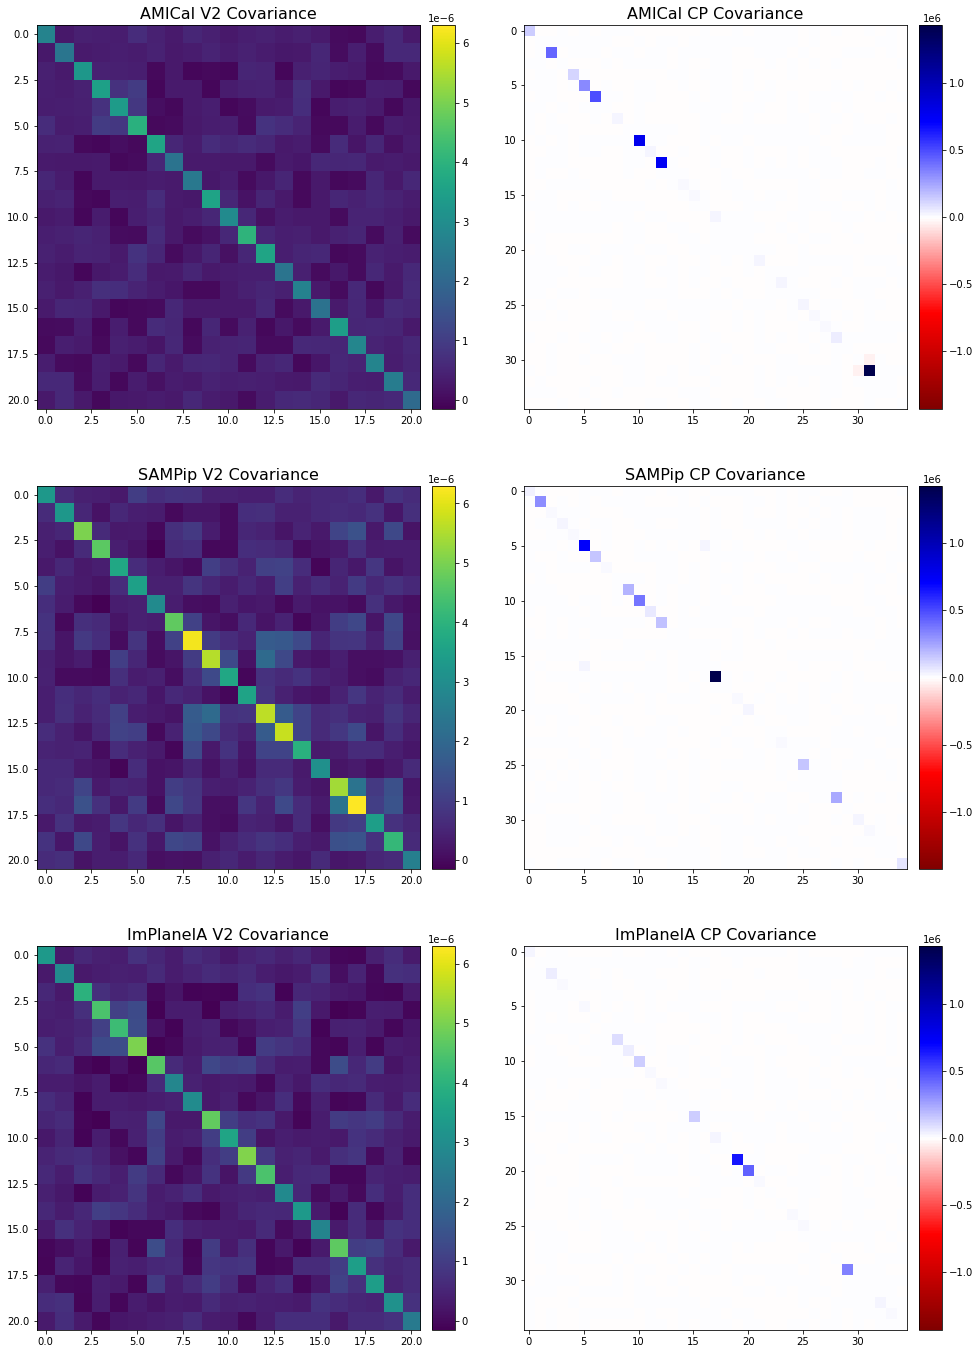

In [21]:
fig, axes = plt.subplots(3,2,figsize=(16.0,24.0))

# get filenames

calfile_sampip = fname_generator('c',90,200,None,'')    
targfile_sampip = fname_generator('t',90,200,None,'')

calfile_amical = fname_generator('c',90,200,'amical','')    
targfile_amical = fname_generator('t',90,200,'amical','')

calfile_implaneia = fname_generator_implaneia('c',90,200,'')    
targfile_implaneia = fname_generator_implaneia('t',90,200,'')    

#load data

cal_amical = np.load(calfile_amical)
targ_amical = np.load(targfile_amical)

cal_sampip = np.load(calfile_sampip)
targ_sampip = np.load(targfile_sampip)


cal_implaneia = oifits.load(calfile_implaneia)
targ_implaneia = oifits.load(targfile_implaneia)

#sampip

v2_cal = cal_sampip['V2']
cp_cal = cal_sampip['CP']

v2_targ = targ_sampip['V2']
cp_targ = targ_sampip['CP']

v2_calmean, v2_calstd, v2_calcov = np.mean(v2_cal,axis=0), np.std(v2_cal,axis=0), np.cov(v2_cal.T)
cp_calmean, cp_calstd, cp_calcov = np.mean(cp_cal,axis=0), np.std(cp_cal, axis=0), np.cov(cp_cal.T)

v2_targmean, v2_targstd, v2_targcov = np.mean(v2_targ,axis=0), np.std(v2_targ,axis=0), np.cov(v2_targ.T)
cp_targmean, cp_targstd, cp_targcov = np.mean(cp_targ,axis=0), np.std(cp_targ, axis=0), np.cov(cp_targ.T)

v2_cov, cp_cov = np.cov((v2_targ/v2_cal).T), np.cov((cp_targ/cp_cal).T)

vmin_v2, vmax_v2 = np.min(v2_cov),np.max(v2_cov)
vmin_cp, vmax_cp = np.min(cp_cov),np.max(cp_cov)
vmin_cp, vmax_cp = -np.max([np.abs(vmin_cp),np.abs(vmax_cp)]), np.max([np.abs(vmin_cp),np.abs(vmax_cp)])

## imshow v2
img_v2_targcov = axes[1,0].imshow(v2_cov,vmin=vmin_v2,vmax=vmax_v2)
ax = axes[1,0]
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(img_v2_targcov,cax=cax)


img_cp_targcov = axes[1,1].imshow(cp_cov,vmin=vmin_cp,vmax=vmax_cp, cmap=mpl.cm.seismic_r)
ax = axes[1,1]
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(img_cp_targcov,cax=cax)


axes[1,0].set_title('SAMPip V2 Covariance',fontsize=16)
axes[1,1].set_title('SAMPip CP Covariance',fontsize=16)

#amical

v2_cal = cal_amical['V2']
cp_cal = cal_amical['CP']

v2_targ = targ_amical['V2']
cp_targ = targ_amical['CP']

# v2_calmean, v2_calstd, v2_calcov = np.mean(v2_cal,axis=0), np.std(v2_cal,axis=0), np.cov(v2_cal.T)
# cp_calmean, cp_calstd, cp_calcov = np.mean(cp_cal,axis=0), np.std(cp_cal, axis=0), np.cov(cp_cal.T)

# v2_targmean, v2_targstd, v2_targcov = np.mean(v2_targ,axis=0), np.std(v2_targ,axis=0), np.cov(v2_targ.T)
# cp_targmean, cp_targstd, cp_targcov = np.mean(cp_targ,axis=0), np.std(cp_targ, axis=0), np.cov(cp_targ.T)
v2_cov, cp_cov = np.cov((v2_targ/v2_cal).T), np.cov((cp_targ/cp_cal).T)


## imshow v2
img_v2_targcov = axes[0,0].imshow(v2_cov,vmin=vmin_v2,vmax=vmax_v2)
ax = axes[0,0]
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(img_v2_targcov,cax=cax)

axes[0,0].set_title('AMICal V2 Covariance',fontsize=16)
img_cp_targcov = axes[0,1].imshow(cp_cov,vmin=vmin_cp,vmax=vmax_cp, cmap=mpl.cm.seismic_r)
ax = axes[0,1]
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(img_cp_targcov,cax=cax)

axes[0,1].set_title('AMICal CP Covariance',fontsize=16)


#implaneia 
v2_cal = cal_implaneia['OI_VIS2']['VIS2DATA'].T
cp_cal = cal_implaneia['OI_T3']['T3PHI'].T

v2_targ = targ_implaneia['OI_VIS2']['VIS2DATA'].T
cp_targ = targ_implaneia['OI_T3']['T3PHI'].T

# v2_calmean, v2_calstd, v2_calcov = np.mean(v2_cal,axis=0), np.std(v2_cal,axis=0), np.cov(v2_cal.T)
# cp_calmean, cp_calstd, cp_calcov = np.mean(cp_cal,axis=0), np.std(cp_cal, axis=0), np.cov(cp_cal.T)

# v2_targmean, v2_targstd, v2_targcov = np.mean(v2_targ,axis=0), np.std(v2_targ,axis=0), np.cov(v2_targ.T)
# cp_targmean, cp_targstd, cp_targcov = np.mean(cp_targ,axis=0), np.std(cp_targ, axis=0), np.cov(cp_targ.T)
v2_cov, cp_cov = np.cov((v2_targ/v2_cal).T), np.cov((cp_targ/cp_cal).T)

## imshow v2
img_v2_targcov = axes[2,0].imshow(v2_cov,vmin=vmin_v2,vmax=vmax_v2)
ax = axes[2,0]
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(img_v2_targcov,cax=cax)

axes[2,0].set_title('ImPlaneIA V2 Covariance',fontsize=16)
img_cp_targcov = axes[2,1].imshow(cp_cov,vmin=vmin_cp,vmax=vmax_cp, cmap=mpl.cm.seismic_r)
ax = axes[2,1]
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(img_cp_targcov,cax=cax)

axes[2,1].set_title('ImPlaneIA CP Covariance',fontsize=16)

# ax3.imshow()

# ax1.legend()

# ax1.legend((ami,imp),('Amical','ImPlaneIA'))
plt.savefig('photonly_cov_amical_sampip.png',bbox_inches='tight')

<ipython-input-13-77f7906a5a42>:1: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.linalg.eig(cp_calcov)[0].real**0.5)


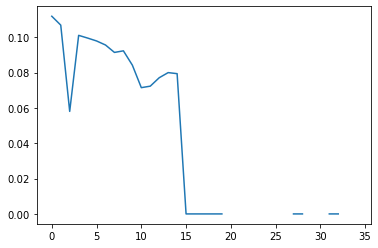

In [13]:
plt.plot(np.linalg.eig(cp_calcov)[0].real**0.5)

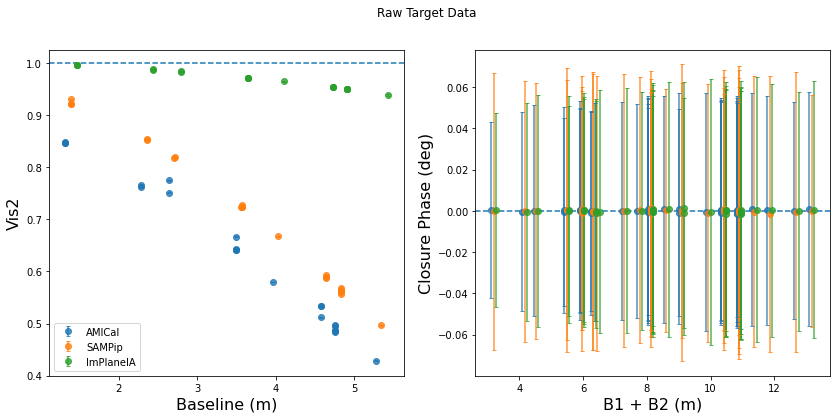

In [14]:
from reduce_all import baseline_plots, covariance_plots
noisetup = ''
baseline_plots(90,200,noisetup,calibrated=False)


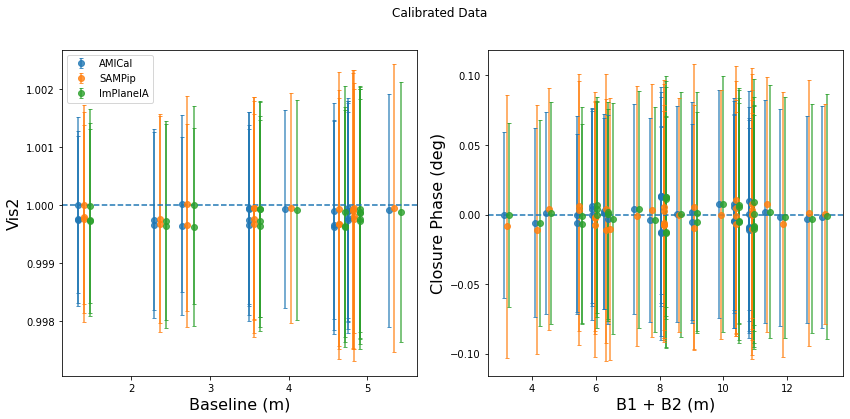

In [15]:
baseline_plots(90,200,noisetup,calibrated=True)


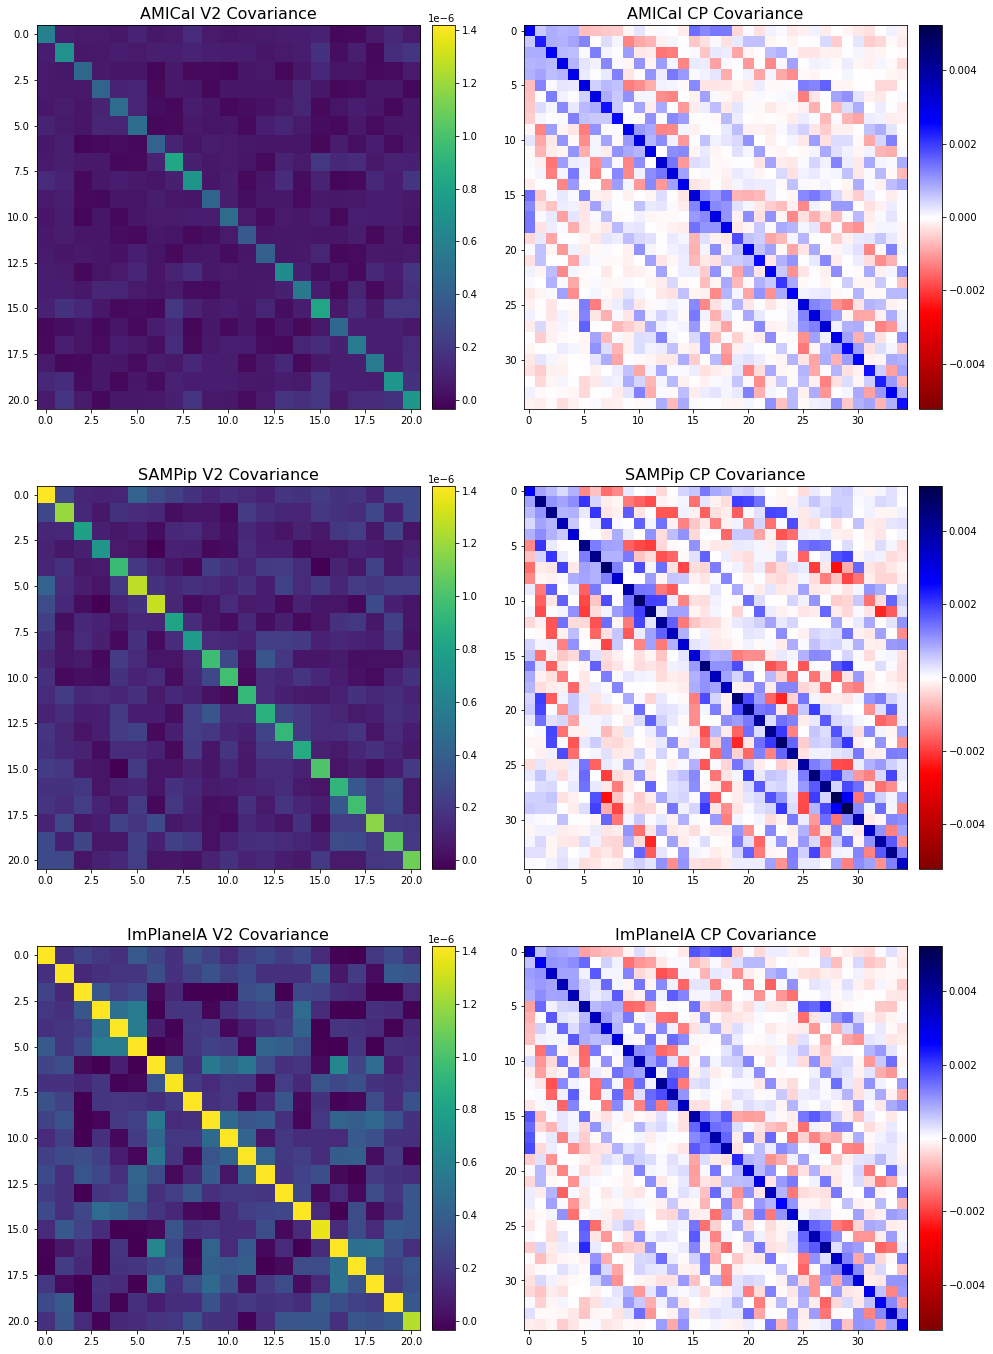

In [16]:
covariance_plots(90,200,noisetup)

In [14]:
v2_noises = 1.0*np.zeros((3,len(noise_comb)))
cp_noises = 1.0*np.zeros((3,len(noise_comb)))

for j, noisetup in enumerate(tqdm(noise_comb)):
    for k, pipeline in enumerate(['amical','implaneia','sampip']):
        v2_mean, v2_std, v2_cov, cp_mean, cp_std, cp_cov = load_data(90,200,noisetup,pipeline,calibrated=True)
#         v2_noise = np.sqrt(np.trace(v2_cov))/np.shape(v2_cov)[0]
#         cp_noise = np.sqrt(np.trace(cp_cov))/15

        v2_noises[k,j] = np.median(v2_std)#v2_noise
        cp_noises[k,j] = np.median(cp_std)#cp_noise
#         print(noisetup,v2_noise,np.median(v2_std))

<ipython-input-14-fedddf3c28ba>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, noisetup in enumerate(tqdm(noise_comb)):


In [20]:
pipeline

'sampip'

In [19]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

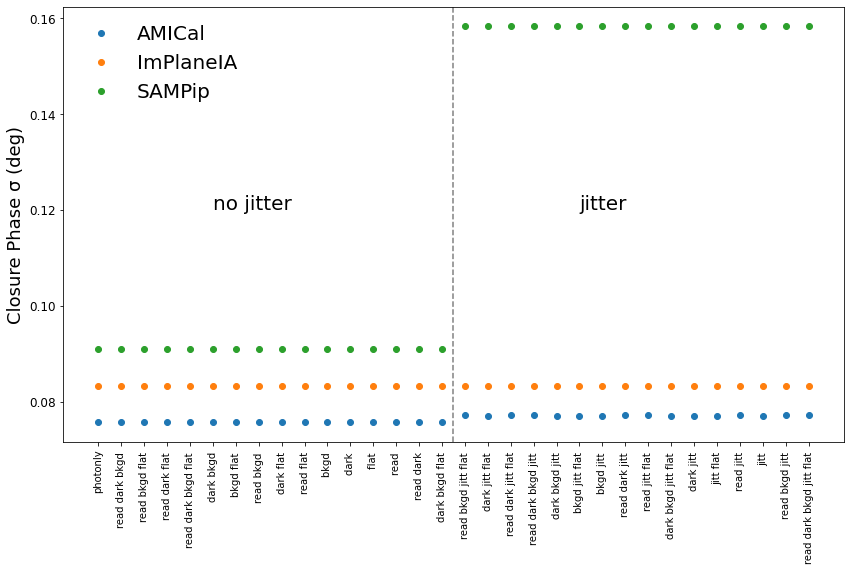

In [31]:
fig = plt.figure(figsize=(14.0,8.0))
my_xticks = np.array([get_tag(noisetup).replace('_',' ') for noisetup in noise_comb])
m = np.array(['jitt' in tick for tick in my_xticks])
s = np.argsort(m)

for j, pipeline in enumerate(['AMICal','ImPlaneIA','SAMPip']):
    plt.plot(cp_noises[j,:][s],'.',label=pipeline,markersize=12)
    
plt.xticks(np.arange(cp_noises.shape[1]),my_xticks[s],rotation=90);
plt.axvline(15.5,linestyle='--',c='k',alpha=0.5)
plt.text(5,0.12,'no jitter',fontsize=20)
plt.text(21,0.12,'jitter',fontsize=20)
plt.legend(fontsize=20,frameon=False)
plt.ylabel('Closure Phase σ (deg)',fontsize=18)
plt.yticks(fontsize=12)

plt.savefig('cp_jitter_no_jitter.png',bbox_inches='tight')

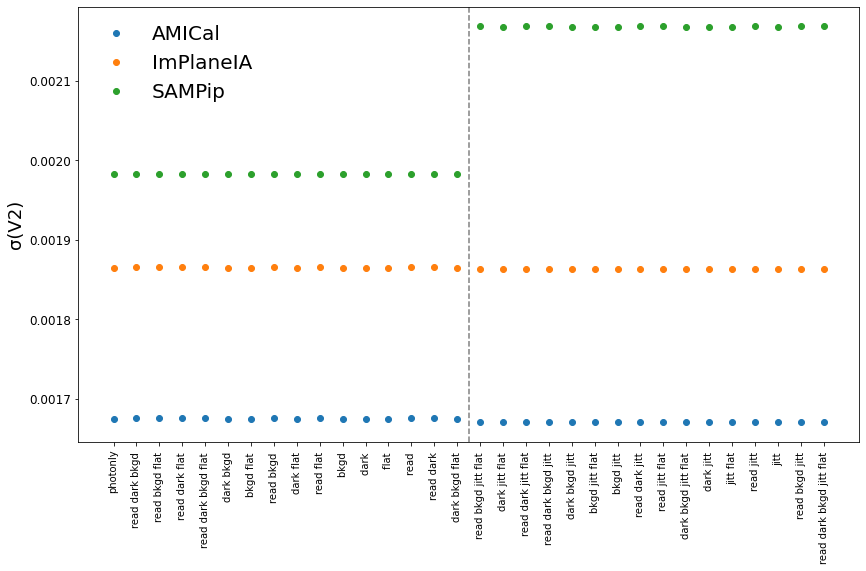

In [32]:
fig = plt.figure(figsize=(14.0,8.0))
my_xticks = np.array([get_tag(noisetup).replace('_',' ') for noisetup in noise_comb])
m = np.array(['jitt' in tick for tick in my_xticks])
s = np.argsort(m)

for j, pipeline in enumerate(['AMICal','ImPlaneIA','SAMPip']):
    plt.plot(v2_noises[j,:][s],'.',label=pipeline,markersize=12)
    
plt.xticks(np.arange(v2_noises.shape[1]),my_xticks[s],rotation=90);
plt.axvline(15.5,linestyle='--',c='k',alpha=0.5)
# plt.text(5,0.09,'no jitter',fontsize=20)
# plt.text(21,0.09,'jitter',fontsize=20)
plt.legend(fontsize=20,frameon=False)
plt.ylabel('σ(V2)',fontsize=18)
plt.yticks(fontsize=12)

plt.savefig('v2_jitter_no_jitter.png',bbox_inches='tight')

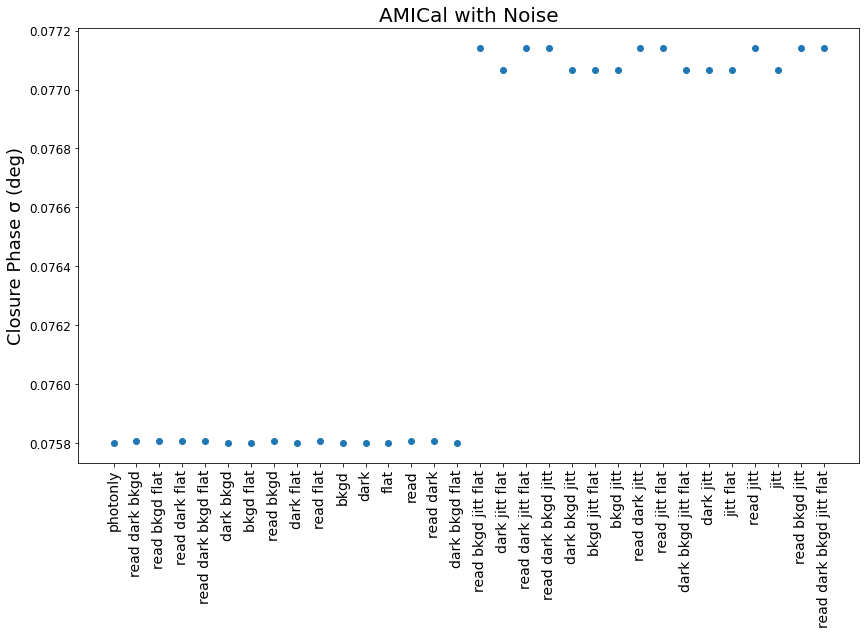

In [22]:
fig = plt.figure(figsize=(14.0,8.0))

my_xticks = np.array([get_tag(noisetup).strip('_').replace('_',' ') for noisetup in noise_comb])
m = np.array(['jitt' in tick for tick in my_xticks])

plt.plot(cp_noises[0,:][s],'.',markersize=12)
plt.xticks(np.arange(len(m)),my_xticks[s],rotation=90,fontsize=14);
plt.title('AMICal with Noise',fontsize=20)
plt.ylabel('Closure Phase σ (deg)',fontsize=18)
plt.yticks(fontsize=12)

plt.savefig('amical_different_noises.png',bbox_inches='tight')

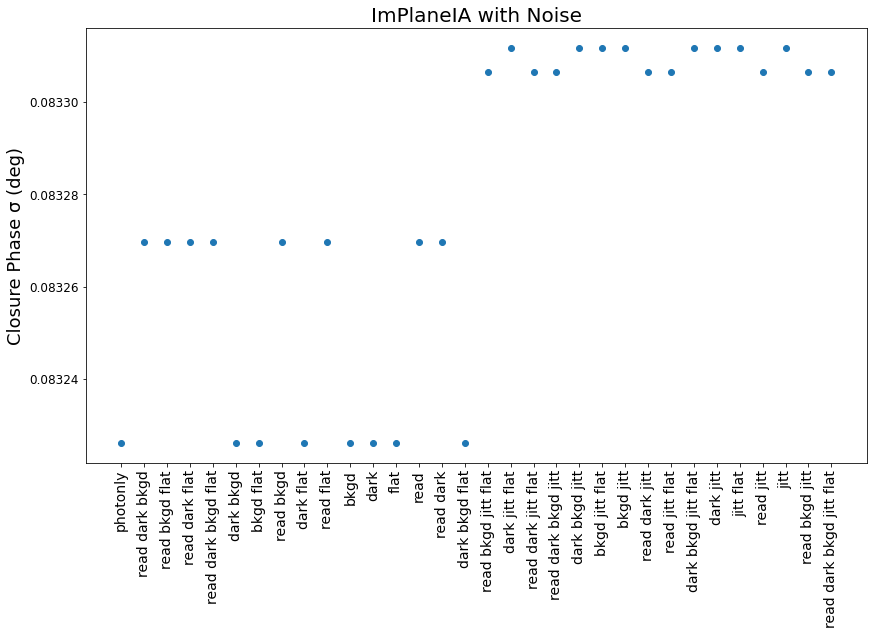

In [23]:
fig = plt.figure(figsize=(14.0,8.0))

my_xticks = np.array([get_tag(noisetup).strip('_').replace('_',' ') for noisetup in noise_comb])
m = np.array(['jitt' in tick for tick in my_xticks])

plt.plot(cp_noises[1,:][s],'.',markersize=12)
plt.xticks(np.arange(len(m)),my_xticks[s],rotation=90,fontsize=14);
plt.title('ImPlaneIA with Noise',fontsize=20)
plt.ylabel('Closure Phase σ (deg)',fontsize=18)
plt.yticks(fontsize=12)

plt.savefig('implaneia_different_noises.png',bbox_inches='tight')

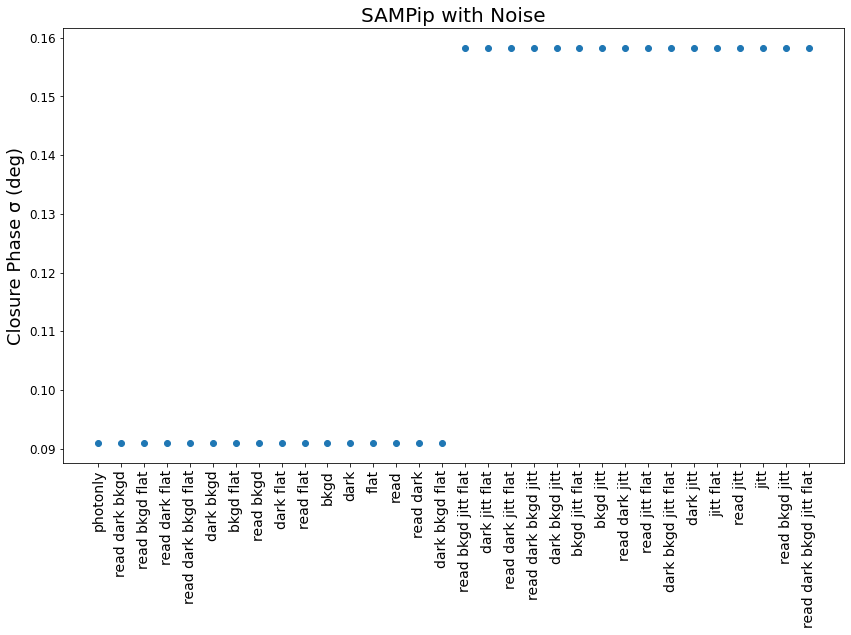

In [24]:
fig = plt.figure(figsize=(14.0,8.0))

my_xticks = np.array([get_tag(noisetup).strip('_').replace('_',' ') for noisetup in noise_comb])
m = np.array(['jitt' in tick for tick in my_xticks])

plt.plot(cp_noises[2,:][s],'.',markersize=12)
plt.xticks(np.arange(len(m)),my_xticks[s],rotation=90,fontsize=14);
plt.title('SAMPip with Noise',fontsize=20)
plt.ylabel('Closure Phase σ (deg)',fontsize=18)
plt.yticks(fontsize=12)

plt.savefig('sampip_different_noises.png',bbox_inches='tight')

## Let's try and estimate what contrast you *can* detect!

In [25]:
dtor = np.pi/180.0
i2pi = 1j*2.0*np.pi

def cvis_binary(u, v, wavel, p, detpa=None):
    ''' Calc. complex vis measured by an array for a binary star
    ----------------------------------------------------------------
    p: 3-component vector (+2 optional), the binary "parameters":
    - p[0] = sep (mas)
    - p[1] = PA (deg) E of N.
    - p[2] = contrast ratio (primary/secondary)
    optional:
    - p[3] = angular size of primary (mas)
    - p[4] = angular size of secondary (mas)
    - u,v: baseline coordinates (meters)
    - wavel: wavelength (meters)
    - detpa: detector position angle (degrees)
    ---------------------------------------------------------------- '''
    if detpa is None:
        th0 = 0.0
    else:
        th0 = detpa * dtor

    p = np.array(p)
    # relative locations
    th = p[1] * dtor
    ddec = mas2rad(p[0] * np.cos(th + th0))
    dra = -mas2rad(p[0] * np.sin(th + th0))

    # baselines into number of wavelength
    x = np.hypot(u, v)/wavel

    # decompose into two "luminosity"
    l2 = 1. / (p[2] + 1)
    l1 = 1 - l2

    # phase-factor
    phi = np.exp(-i2pi*(u*dra + v*ddec)/wavel)

    # optional effect of resolved individual sources
    if p.size == 5:
        th1, th2 = mas2rad(p[3]), mas2rad(p[4])
        v1 = 2*j1(np.pi*th1*x)/(np.pi*th1*x)
        v2 = 2*j1(np.pi*th2*x)/(np.pi*th2*x)
    else:
        v1 = np.ones(u.size, dtype=u.dtype)
        v2 = np.ones(u.size, dtype=u.dtype)

    cvis = l1 * v1 + l2 * v2 * phi

    return cvis
# =========================================================================
def mas2rad(x):
    ''' Convenient little function to convert milliarcsec to radians '''
    return(x * 4.8481368110953599e-09)  # *= np.pi/(180*3600*1000)


# =========================================================================
def rad2mas(x):
    '''  convert radians to mas'''
    return(x / 4.8481368110953599e-09)  # /= np.pi/(180*3600*1000)


In [26]:
params = [90.,200.,1e-1]
wavel = 38298.84e-10

def bispec(p):
    v1 = cvis_binary(sampip_u1,sampip_v1,wavel,p)
    v2 = cvis_binary(sampip_u2,sampip_v2,wavel,p) 
    v3 = cvis_binary(-(sampip_u1+sampip_u2),-(sampip_v1+sampip_v2),wavel,p) 
    return  v1*v2*np.conjugate(v3)

def v2(p):
    return np.abs(cvis_binary(sampip_u1,sampip_v1,wavel,p))**2

def cp(p):
    return np.angle(bispec(p),deg=True)

In [27]:
cp_noises[0,0]

0.07580074732126439

(0.0, 1.0)

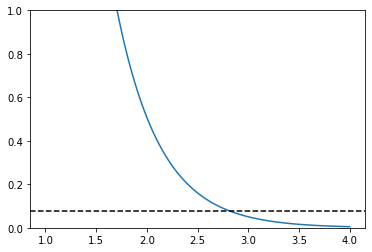

In [28]:
cp_pred = []
log_cons = np.linspace(1,4,100)
for log_con in log_cons:
    params = [200,90,10**log_con]
    cp_pred.append(np.median(cp(params)))
    
cp_pred=np.array(cp_pred)

plt.plot(log_cons,cp_pred)
# plt.xlim(-1,-4)
plt.axhline(cp_noises[0,0],linestyle='--',color='k')
plt.ylim(0,1)

(0.99, 1.0)

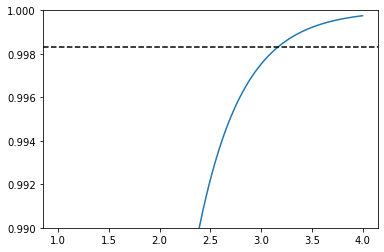

In [29]:
v2_pred = []
log_cons = np.linspace(1,4,100)

for log_con in log_cons:
    params = [200,90,10**log_con]
    v2_pred.append(np.median(v2(params)))
    
v2_pred=np.array(v2_pred)

plt.plot(log_cons,v2_pred)
# plt.xlim(-1,-4)
plt.axhline(1-v2_noises[0,0],linestyle='--',color='k')
plt.ylim(0.99,1)

In [30]:
(v2([200,90,2]))

array([0.44945406, 0.44945406, 0.44945406, 0.44945406, 0.44945406,
       0.44945406, 0.44945406, 0.44945406, 0.44945406, 0.44671001,
       0.44671001, 0.44671001, 0.85388905, 0.85388905, 0.85388905,
       1.        , 1.        , 1.        , 1.        , 0.16308915,
       0.16308915, 0.16308915, 0.80424557, 0.80424557, 0.80424557,
       0.16308915, 0.16308915, 0.16308915, 0.80424557, 0.80424557,
       0.80424557, 0.16308915, 0.16308915, 0.16308915, 1.        ])